In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic'

import warnings
warnings.filterwarnings('ignore')

In [3]:
df_copy = pd.read_excel('/content/drive/MyDrive/data/final_data.xlsx')
df_copy.head()

,yyyymmdd,area,sex,frequency,최저기온,최고기온,일평균기온,일평균습도,강수량,적설,...,흉부외과,흡연율,병실수,보건시설,공장수,SO2,CO,O3,NO2,PM10
0,2012-01-01,강원,1,3,-13.9,6.0,-7.4000,70.000,2.857143,0.0,...,30,26.2,20959,245,2877,0.010033,1.012879,0.019098,0.020873,81.560300
1,2012-01-01,강원,2,3,-13.9,6.0,-7.4000,70.000,2.857143,0.0,...,30,26.2,20959,245,2877,0.010033,1.012879,0.019098,0.020873,81.560300
2,2012-01-01,경기,1,4,-12.2,1.1,-6.2875,67.625,0.000000,0.0,...,169,24.5,123168,334,54213,0.009092,0.962206,0.012449,0.030763,85.343681
3,2012-01-01,경기,2,5,-12.2,1.1,-6.2875,67.625,0.000000,0.0,...,169,24.5,123168,334,54213,0.009092,0.962206,0.012449,0.030763,85.343681
4,2012-01-01,경남,1,2,-8.9,8.0,1.6500,55.625,0.000000,0.0,...,52,24.1,56963,410,15305,0.008975,0.653175,0.021261,0.017499,62.009501


In [4]:
df = df_copy.copy()

In [5]:
df.columns = ['date', 'area', 'sex',
       'frequency', 'SO2', 'CO', 'O3', 'NO2', 'PM10', '간호사',
       '고령인구비율', '구급인력', '구급차', '병원', '비만율', '상급종합병원', '신경외과', '약국',
       '요양병원', '응급의학과', '종합병원', '흉부외과', '흡연율', '병실수', '보건시설', '공장수', '최저기온',
       '최고기온', '일평균기온', '일평균습도', '강수량', '적설']

In [6]:
df.columns

Index(['date', 'area', 'sex', 'frequency', 'SO2', 'CO', 'O3', 'NO2', 'PM10',
       '간호사', '고령인구비율', '구급인력', '구급차', '병원', '비만율', '상급종합병원', '신경외과', '약국',
       '요양병원', '응급의학과', '종합병원', '흉부외과', '흡연율', '병실수', '보건시설', '공장수', '최저기온',
       '최고기온', '일평균기온', '일평균습도', '강수량', '적설'],
      dtype='object')

In [7]:
def cor_show(df):
  plt.figure(figsize=(30,15))
  cor = df.corr()
  sns.heatmap(cor, annot=True)
  plt.show()

def cor(df):
  cor = df.corr()
  cor_target = abs(cor['frequency'])
  return cor_target.sort_values(ascending=False)

변수 추가

In [8]:
# 연도, 월, 일 변수 추가
df['year'], df['month'], df['day'] = (df['date'].dt.year, df['date'].dt.month, df['date'].dt.day)

In [9]:
# 요일 변수 추가 월~일 : 0~6
df['dayofweek'] = df['date'].dt.dayofweek

In [10]:
# 계절 변수 추가
spring_id = (3<= df['month']) & (df['month']<= 5)
summer_id = (6<= df['month']) & (df['month']<= 8)
fall_id = (9<= df['month']) & (df['month']<= 11)
winter_id = (12 == df['month']) | (1<= df['month']) & (df['month']<= 2)
df.loc[spring_id, 'season'] = 1 # 봄
df.loc[summer_id, 'season'] = 2 # 여름
df.loc[fall_id, 'season'] = 3 # 가을
df.loc[winter_id, 'season'] = 4 # 겨울

In [11]:
# 주말 변수 추가
weekend_id = (df['dayofweek'] == 5) | (df['dayofweek'] == 6)
df['weekend'] = 0
df.loc[weekend_id, 'weekend'] = 1

In [12]:
# 일교차 열 추가
df['일교차'] = df['최고기온'] - df['최저기온']
df['일교차']

0        -2876.989967
1        -2876.989967
2       -54212.990908
3       -54212.990908
4       -15304.991025
             ...     
49669     -674.997097
49670    -8476.995429
49671    -8476.995429
49672    -7166.994403
49673    -7166.994403
Name: 일교차, Length: 49674, dtype: float64

In [13]:
df.head()

,date,area,sex,frequency,SO2,CO,O3,NO2,PM10,간호사,...,일평균습도,강수량,적설,year,month,day,dayofweek,season,weekend,일교차
0,2012-01-01,강원,1,3,-13.9,6.0,-7.4000,70.000,2.857143,0.0,...,0.019098,0.020873,81.560300,2012,1,1,6,4.0,1,-2876.989967
1,2012-01-01,강원,2,3,-13.9,6.0,-7.4000,70.000,2.857143,0.0,...,0.019098,0.020873,81.560300,2012,1,1,6,4.0,1,-2876.989967
2,2012-01-01,경기,1,4,-12.2,1.1,-6.2875,67.625,0.000000,0.0,...,0.012449,0.030763,85.343681,2012,1,1,6,4.0,1,-54212.990908
3,2012-01-01,경기,2,5,-12.2,1.1,-6.2875,67.625,0.000000,0.0,...,0.012449,0.030763,85.343681,2012,1,1,6,4.0,1,-54212.990908
4,2012-01-01,경남,1,2,-8.9,8.0,1.6500,55.625,0.000000,0.0,...,0.021261,0.017499,62.009501,2012,1,1,6,4.0,1,-15304.991025


In [14]:
df_spring = df[df['season'] == 1]
df_summer = df[df['season'] == 2]
df_fall = df[df['season'] == 3]
df_winter = df[df['season'] == 4]

In [15]:
df.columns

Index(['date', 'area', 'sex', 'frequency', 'SO2', 'CO', 'O3', 'NO2', 'PM10',
       '간호사', '고령인구비율', '구급인력', '구급차', '병원', '비만율', '상급종합병원', '신경외과', '약국',
       '요양병원', '응급의학과', '종합병원', '흉부외과', '흡연율', '병실수', '보건시설', '공장수', '최저기온',
       '최고기온', '일평균기온', '일평균습도', '강수량', '적설', 'year', 'month', 'day',
       'dayofweek', 'season', 'weekend', '일교차'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49674 entries, 0 to 49673
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       49674 non-null  datetime64[ns]
 1   area       49674 non-null  object        
 2   sex        49674 non-null  int64         
 3   frequency  49674 non-null  int64         
 4   SO2        49674 non-null  float64       
 5   CO         49674 non-null  float64       
 6   O3         49674 non-null  float64       
 7   NO2        49674 non-null  float64       
 8   PM10       49674 non-null  float64       
 9   간호사        49674 non-null  float64       
 10  고령인구비율     49674 non-null  int64         
 11  구급인력       49674 non-null  float64       
 12  구급차        49674 non-null  int64         
 13  병원         49674 non-null  int64         
 14  비만율        49674 non-null  int64         
 15  상급종합병원     49674 non-null  float64       
 16  신경외과       49674 non-null  int64        

특성과 레이블 분리

In [17]:
df.columns

Index(['date', 'area', 'sex', 'frequency', 'SO2', 'CO', 'O3', 'NO2', 'PM10',
       '간호사', '고령인구비율', '구급인력', '구급차', '병원', '비만율', '상급종합병원', '신경외과', '약국',
       '요양병원', '응급의학과', '종합병원', '흉부외과', '흡연율', '병실수', '보건시설', '공장수', '최저기온',
       '최고기온', '일평균기온', '일평균습도', '강수량', '적설', 'year', 'month', 'day',
       'dayofweek', 'season', 'weekend', '일교차'],
      dtype='object')

In [18]:
col_idx = (df.columns != 'frequency') & (df.columns != 'date') & (df.columns != 'area') & (df.columns != 'sex')

In [19]:
X = df.iloc[:,col_idx]
y = df['frequency']

X

,SO2,CO,O3,NO2,PM10,간호사,고령인구비율,구급인력,구급차,병원,...,일평균습도,강수량,적설,year,month,day,dayofweek,season,weekend,일교차
0,-13.9,6.0,-7.4000,70.000,2.857143,0.0,3983,15.7,566,871,...,0.019098,0.020873,81.560300,2012,1,1,6,4.0,1,-2876.989967
1,-13.9,6.0,-7.4000,70.000,2.857143,0.0,3983,15.7,566,871,...,0.019098,0.020873,81.560300,2012,1,1,6,4.0,1,-2876.989967
2,-12.2,1.1,-6.2875,67.625,0.000000,0.0,20380,9.4,1421,1796,...,0.012449,0.030763,85.343681,2012,1,1,6,4.0,1,-54212.990908
3,-12.2,1.1,-6.2875,67.625,0.000000,0.0,20380,9.4,1421,1796,...,0.012449,0.030763,85.343681,2012,1,1,6,4.0,1,-54212.990908
4,-8.9,8.0,1.6500,55.625,0.000000,0.0,7548,12.5,731,515,...,0.021261,0.017499,62.009501,2012,1,1,6,4.0,1,-15304.991025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49669,3.5,12.5,6.6250,54.375,0.000000,0.0,2231,13.8,208,71,...,0.034771,0.009910,74.854167,2015,12,31,3,4.0,0,-674.997097
49670,-7.0,8.0,-1.6250,76.250,0.000000,0.0,4424,16.4,639,371,...,0.017996,0.019843,53.587500,2015,12,31,3,4.0,0,-8476.995429
49671,-7.0,8.0,-1.6250,76.250,0.000000,0.0,4424,16.4,639,371,...,0.017996,0.019843,53.587500,2015,12,31,3,4.0,0,-8476.995429
49672,-8.0,6.7,-0.2250,71.625,0.000000,0.0,3726,14.8,443,284,...,0.009818,0.028704,63.086927,2015,12,31,3,4.0,0,-7166.994403


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(39739, 35)
(9935, 35)


변수 선택

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


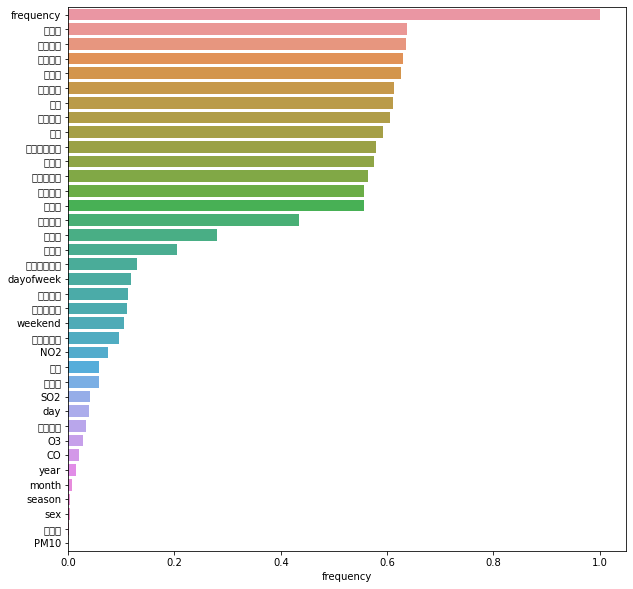

In [21]:
a = cor(df)[:40]
plt.figure(figsize=(10, 10))
sns.barplot(y=a.index, x=a)

정규화


In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [23]:
pd.DataFrame(X_std, columns=X.columns)

,SO2,CO,O3,NO2,PM10,간호사,고령인구비율,구급인력,구급차,병원,...,일평균습도,강수량,적설,year,month,day,dayofweek,season,weekend,일교차
0,-1.882425,-1.475243,-2.038495,0.261890,0.122008,-0.141463,-0.489807,0.768262,0.280665,0.977927,...,-0.743780,0.038874,1.537441,-1.340356,-1.601451,-1.673805,1.500642,1.350443,1.582276,0.519177
1,-1.882425,-1.475243,-2.038495,0.261890,0.122008,-0.141463,-0.489807,0.768262,0.280665,0.977927,...,-0.743780,0.038874,1.537441,-1.340356,-1.601451,-1.673805,1.500642,1.350443,1.582276,0.519177
2,-1.726063,-1.980896,-1.927860,0.086212,-0.273716,-0.141463,1.394723,-1.251822,2.868398,3.138475,...,-1.319677,1.009405,1.700645,-1.340356,-1.601451,-1.673805,1.500642,1.350443,1.582276,-3.511389
3,-1.726063,-1.980896,-1.927860,0.086212,-0.273716,-0.141463,1.394723,-1.251822,2.868398,3.138475,...,-1.319677,1.009405,1.700645,-1.340356,-1.601451,-1.673805,1.500642,1.350443,1.582276,-3.511389
4,-1.422536,-1.268854,-1.138501,-0.801419,-0.273716,-0.141463,-0.080077,-0.257812,0.780052,0.146407,...,-0.556460,-0.292225,0.694078,-1.340356,-1.601451,-1.673805,1.500642,1.350443,1.582276,-0.456588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49669,-0.282010,-0.804478,-0.643753,-0.893881,-0.273716,-0.141463,-0.691167,0.159031,-0.802854,-0.890656,...,0.613603,-1.036890,1.248158,1.342192,1.588154,1.735250,0.001026,1.350443,-0.632001,0.692063
49670,-1.247778,-1.268854,-1.464189,0.724198,-0.273716,-0.141463,-0.439123,0.992716,0.501606,-0.189937,...,-0.839281,-0.062218,0.330778,1.342192,1.588154,1.735250,0.001026,1.350443,-0.632001,0.079501
49671,-1.247778,-1.268854,-1.464189,0.724198,-0.273716,-0.141463,-0.439123,0.992716,0.501606,-0.189937,...,-0.839281,-0.062218,0.330778,1.342192,1.588154,1.735250,0.001026,1.350443,-0.632001,0.079501
49672,-1.339756,-1.403007,-1.324964,0.382090,-0.273716,-0.141463,-0.519345,0.479679,-0.091606,-0.393146,...,-1.547562,0.807338,0.740555,1.342192,1.588154,1.735250,0.001026,1.350443,-0.632001,0.182354


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=.2, random_state=42)

In [25]:
print('train set', X_train.shape, y_train.shape)
print('validation set', X_valid.shape, y_valid.shape)
print('test set', X_test.shape, y_test.shape)

train set (31791, 35) (31791,)
validation set (7948, 35) (7948,)
test set (9935, 35) (9935,)


In [26]:
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=.2, random_state=42)

모델 만들기

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

print(tf.__version__)

2.8.2


In [28]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[35]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  model.compile(loss='mse',
                optimizer='adam')
  return model

In [29]:
model = build_model()

모델 확인

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2304      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 6,529
Trainable params: 6,529
Non-trainable params: 0
_________________________________________________________________


모델 훈련

In [31]:
model = build_model()

early_stop = EarlyStopping(monitor='val_loss', patience=10)
filename = 'tmp_checkpoint.h5'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

In [32]:
history = model.fit(X_train, y_train, epochs=200,
                    batch_size=16, validation_data=(X_valid, y_valid),
                    callbacks=[early_stop, checkpoint])

Epoch 1/200
2483/2484 [============================>.] - ETA: 0s - loss: 1.5763
Epoch 1: val_loss improved from inf to 1.54242, saving model to tmp_checkpoint.h5
2484/2484 [==============================] - 11s 3ms/step - loss: 1.5761 - val_loss: 1.5424
Epoch 2/200
2474/2484 [============================>.] - ETA: 0s - loss: 1.5306
Epoch 2: val_loss improved from 1.54242 to 1.52759, saving model to tmp_checkpoint.h5
2484/2484 [==============================] - 7s 3ms/step - loss: 1.5299 - val_loss: 1.5276
Epoch 3/200
2469/2484 [============================>.] - ETA: 0s - loss: 1.5186
Epoch 3: val_loss improved from 1.52759 to 1.51043, saving model to tmp_checkpoint.h5
2484/2484 [==============================] - 6s 2ms/step - loss: 1.5180 - val_loss: 1.5104
Epoch 4/200
2469/2484 [============================>.] - ETA: 0s - loss: 1.5087
Epoch 4: val_loss improved from 1.51043 to 1.50443, saving model to tmp_checkpoint.h5
2484/2484 [==============================] - 7s 3ms/step - loss: 1

In [34]:
mse = model.evaluate(X_train, y_train, verbose=2)

print("MSE: {:5.4f} ".format(mse))

1242/1242 - 2s - loss: 1.2369 - 2s/epoch - 1ms/step
MSE: 1.2369 


In [35]:
rmse = np.sqrt(mse)

print("RMSE: {:5.4f} ".format(rmse))

RMSE: 1.1121 


In [33]:
mse_test = model.evaluate(X_test, y_test, verbose=2)

print("MSE: {:5.4f} ".format(mse_test))

311/311 - 0s - loss: 1.7238 - 437ms/epoch - 1ms/step
MSE: 1.7238 


In [36]:
rmse_test = np.sqrt(mse_test)

print("RMSE: {:5.4f} ".format(rmse_test))

RMSE: 1.3129 


# CNN
## RMSE 결과: 1.3129